In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./df_train_v3_1m.csv')

훈련 세트 정확도: 1.0
검증 세트 정확도: 0.9980295011822993
Feature importance
feature 0 = lat
feature 1 = lon
feature 2 = sog
feature 3 = cog
feature 4 = hdg
feature 5 = khnp_buoy.ws
feature 6 = khnp_buoy.wd
feature 7 = kma_lightbecon.ws
feature 8 = kma_lightbecon.wd
feature 9 = kma_pagobuoy.max_wh
feature 10 = kma_pagobuoy.sig_wh
feature 11 = kma_pagobuoy.mean_wh


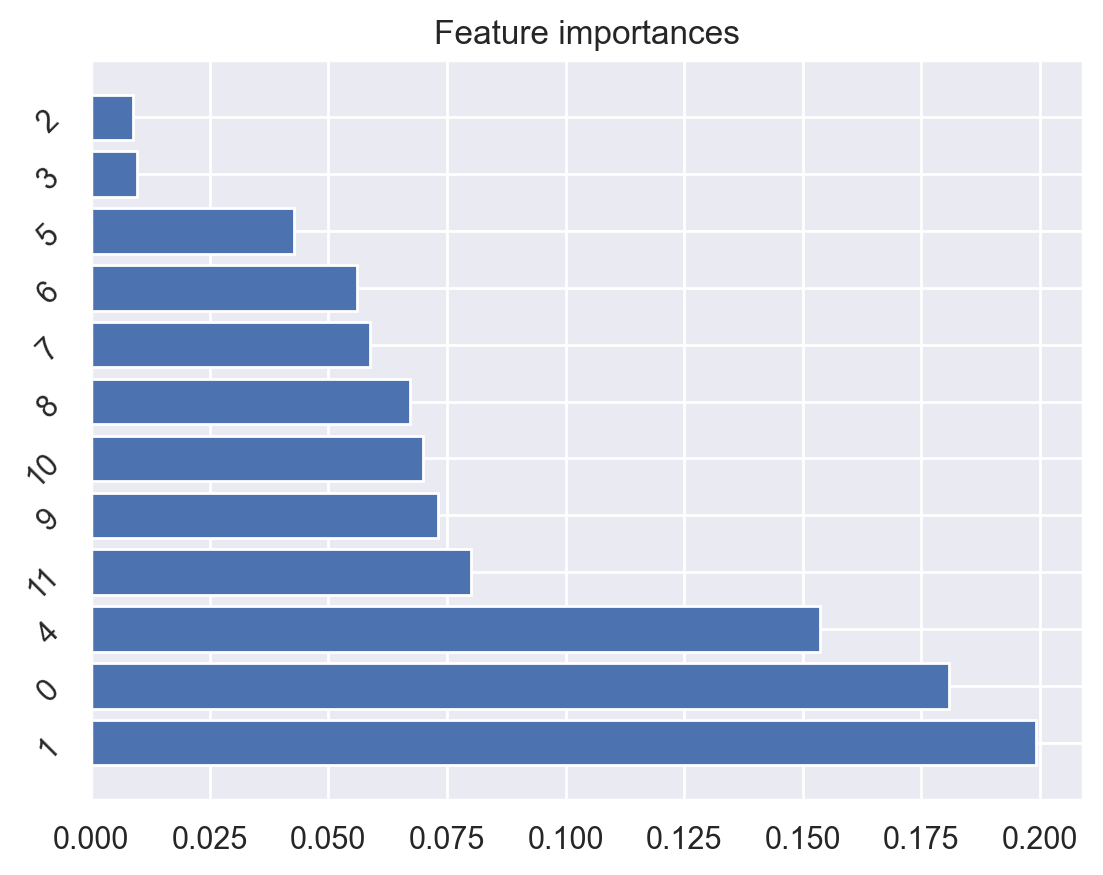

In [3]:
#MinMax 스케일리 + 시간제거

# 데이터 전처리
data = df_train.drop(columns=['answer', 'year', 'month', 'day', 'hour', 'min'])
target = df_train['answer']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 축소된 데이터로 모델 훈련
X_train, X_val, y_train, y_val = train_test_split(data_scaled, target, test_size=0.2, random_state=123, stratify=target)

#Feature importance 시각화
x = X_train
y = y_train

forest = RandomForestClassifier()
forest.fit(x, y)

importance = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importance)[::-1]

train_accuracy = forest.score(X_train, y_train)
val_accuracy = forest.score(X_val, y_val)
print("훈련 세트 정확도:", train_accuracy)
print("검증 세트 정확도:", val_accuracy)

print('Feature importance')

#for f in range(x.shape[1]):
#    print("{}. feature {} ({:.3f})".format(f + 1, indices[f], importance[indices[f]]))
    
for f in range(x.shape[1]):
    print("feature {} = {}".format(f, data.columns[f]))
    
plt.figure()
plt.title("Feature importances")
plt.barh(range(x.shape[1]), importance[indices], yerr= False, align="center")
plt.yticks(range(x.shape[1]), indices, rotation=45)
plt.ylim([-1, x.shape[1]])
plt.show()